# 実践11
data-analysis-basic-kadaiリポジトリへpractice_11フォルダを作成し以下格納する。

## 実践11-1:
* 以下のデータを読み込んでください。
```
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target
```
* 各変数の特徴（含む欠損・外れ値）を可視化や数値計算等で確認してください。必要に応じて加工してください。
* 標準化をしてください。
* （応用：可能であれば）多重共線性を確認し、必要に応じて変数を削除してください。その結果でモデルを変更してください。ヒント: statsmodelのvariance_inflation_factorを用いてVIFを算出する。
* 回帰モデルを作成してください。
* 推論結果を確認してください。その際、以下の確認をしてください。
    * 決定係数 (R^2)
    * RMSE


In [1]:
# データの読み込み
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target

In [2]:
# データの確認
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.DataFrame(data.data)
display(df.head())
display(df.info())
display(df.describe())
display(df.shape)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(178, 13)

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

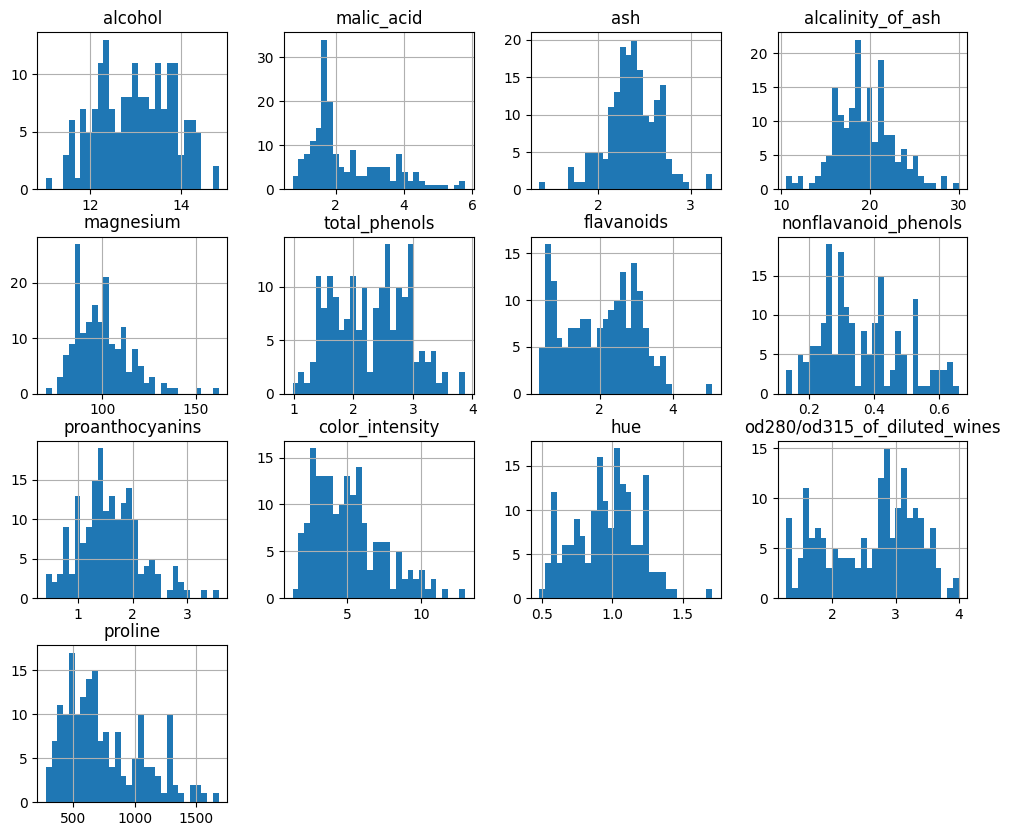

In [4]:
df.hist(bins=30, figsize=(12, 10))

In [5]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(178, 13) (124, 13) (54, 13) (178,) (124,) (54,)


In [6]:
# 変換モデルの作成
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
# スケール変換
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_X_train = pd.DataFrame(X_train_scaled, columns=data.feature_names)
display(df_X_train.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,-3.771177e-15,-4.571836e-16,-2.087936e-15,-3.525406e-16,-2.793464e-16,-5.936112e-16,2.578583e-16,-3.142647e-16,-6.177854e-17,3.366483e-16,-2.130912e-16,-1.772775e-16,5.058677e-17
std,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00
min,-2.447137e+00,-1.319411e+00,-3.644349e+00,-2.503658e+00,-2.060863e+00,-1.937837e+00,-1.540971e+00,-1.812560e+00,-2.001427e+00,-1.588473e+00,-1.772641e+00,-1.851614e+00,-1.413367e+00
25%,-7.775506e-01,-6.856352e-01,-5.018707e-01,-6.874428e-01,-7.594980e-01,-8.755612e-01,-9.218143e-01,-7.619138e-01,-6.125960e-01,-8.326511e-01,-7.496066e-01,-9.688576e-01,-7.696952e-01
50%,7.133863e-02,-4.405162e-01,-1.142613e-02,-2.126345e-02,-1.430618e-01,-9.767432e-02,9.812354e-02,-1.961814e-01,-9.650484e-02,-1.921238e-01,1.766935e-02,2.475396e-01,-2.576836e-01
75%,8.231225e-01,7.629962e-01,7.333230e-01,6.098539e-01,4.220047e-01,7.471276e-01,8.200443e-01,6.928267e-01,5.706373e-01,5.871845e-01,6.996924e-01,7.897053e-01,7.785302e-01
max,2.213923e+00,2.885153e+00,3.112887e+00,2.937976e+00,4.240485e+00,2.712756e+00,1.819429e+00,2.390024e+00,3.302144e+00,2.882407e+00,3.214652e+00,1.943545e+00,2.601454e+00


In [8]:
# 回帰を行う
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
# 予測値を代入する
y_pred = model.predict(X_test_scaled)

In [10]:
# 決定係数とRMSEを表示
from sklearn.metrics import mean_squared_error, r2_score
print(f"決定係数:{r2_score(y_test,y_pred)}")
print(f"RMSE:{mean_squared_error(y_test, y_pred, squared=False)}")

決定係数:0.8436193575843106
RMSE:0.3012297878786227


,vif
alcohol,206.189057
malic_acid,8.925541
ash,165.640370
alcalinity_of_ash,73.141564
magnesium,67.364868
total_phenols,62.786935
flavanoids,35.535602
nonflavanoid_phenols,16.636708
proanthocyanins,17.115665
color_intensity,17.022272


<Axes: >

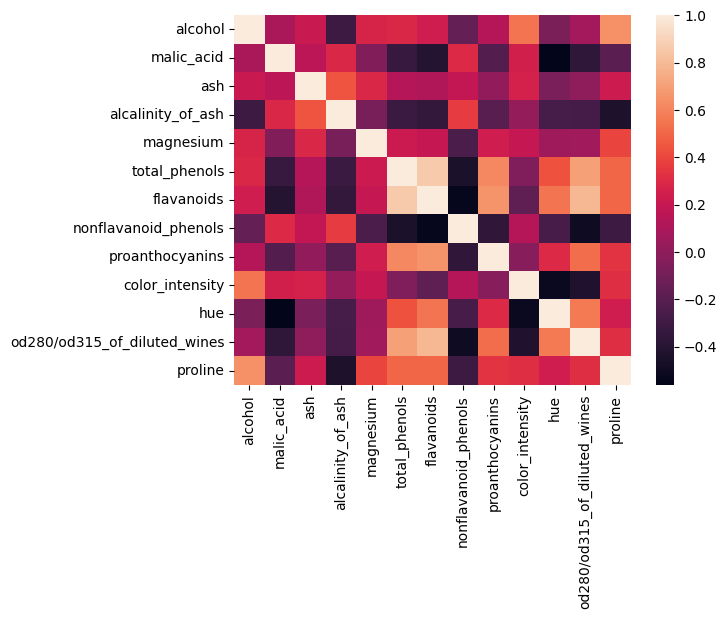

In [11]:
# 多重共線性の確認
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.index = X.columns
display(vif)
sns.heatmap(X.corr())

,vif
malic_acid,4.590935
proanthocyanins,9.722339
color_intensity,5.342919
hue,9.136146


<Axes: >

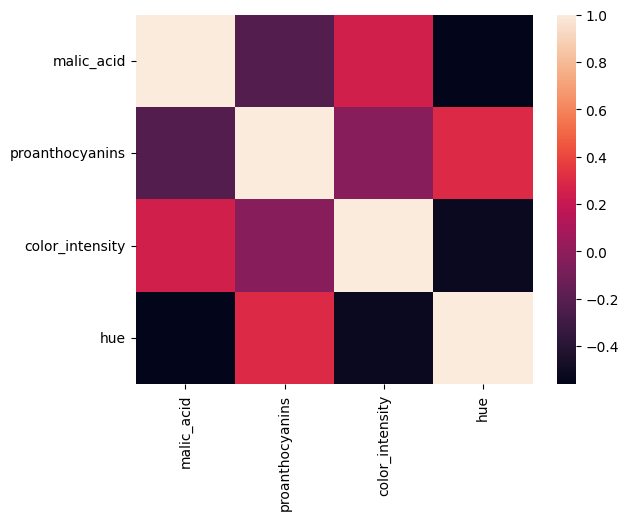

In [12]:
# vifが高いカラムを削除
X_ = df.drop(['alcohol', 'total_phenols','proline','od280/od315_of_diluted_wines','flavanoids','ash','magnesium','alcalinity_of_ash','nonflavanoid_phenols'],  axis=1)
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])]
vif.index = X_.columns
display(vif)
sns.heatmap(X_.corr())

In [13]:
# データ分割
X = X_.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# 予測
y_pred = model.predict(X_test_scaled)

In [17]:
# 決定係数とRMSEを表示
from sklearn.metrics import mean_squared_error, r2_score
print(f"決定係数:{r2_score(y_test,y_pred)}")
print(f"RMSE:{mean_squared_error(y_test, y_pred, squared=False)}")

決定係数:0.4558425605912466
RMSE:0.5619125151824431


## 実践11-2 (応用)
* 標準化以外の代表的な変換について調べ、標準化(StandardScaler)との違いを記載してください。
* 上記実践1と同じ問題で別の変換手法を用いて評価してください。

In [18]:
"""
標準化以外の代表的な変換:　正規化
特徴: データを最小値0から最大値1の範囲に調整する。外れ値に敏感に反応するため、最小値と最大値が明確な場合に適した手法である。
"""
# データの読み込み
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target

In [19]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(178, 13) (124, 13) (54, 13) (178,) (124,) (54,)


In [20]:
# 変換モデルの作成
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [21]:
# 正規化
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#データ学習
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# 予測を代入
y_pred = model.predict(X_test_scaled)

In [24]:
# 決定係数とRMSEを表示
from sklearn.metrics import r2_score, mean_squared_error
print(f"決定係数:{r2_score(y_test,y_pred)}")
print(f"RMSE:{mean_squared_error(y_test, y_pred, squared=False)}")

決定係数:0.8436193575843106
RMSE:0.3012297878786227


## 実践11-3(応用)
* 11-1と同じデータに対してRidge, Lasso, ElasticNetを適用して評価してください。

In [25]:
# データの読み込み
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

# 変換モデルの作成
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# 標準化
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

(178, 13) (124, 13) (54, 13) (178,) (124,) (54,)


In [30]:
# リッジ回帰
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=0)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

# 決定係数とRMSEを表示
from sklearn.metrics import r2_score, mean_squared_error
print(f"決定係数:{r2_score(y_test,y_pred)}")
print(f"RMSE:{mean_squared_error(y_test, y_pred, squared=False)}")

決定係数:0.8495907996668589
RMSE:0.2954225351380259


In [32]:
# ラッソ回帰
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0, alpha=0.0001, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

# 決定係数とRMSEを表示
from sklearn.metrics import r2_score, mean_squared_error
print(f"決定係数:{r2_score(y_test, y_pred)}")
print(f"RMSE:{mean_squared_error(y_test, y_pred, squared=False)}")

決定係数:0.8438009942788105
RMSE:0.3010547972944851


In [33]:
# エラスティックネット
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(random_state=0, alpha=0.0001, max_iter=10000)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

# 決定係数とRMSEを表示
from sklearn.metrics import r2_score, mean_squared_error
print(f"決定係数:{r2_score(y_test, y_pred)}")
print(f"RMSE:{mean_squared_error(y_test, y_pred, squared=False)}")

決定係数:0.8437543923000764
RMSE:0.3010997037998389
